In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [ ]:
df = pd.read_csv("data/housing.csv")

df.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
print(f"Nombre de lignes : {df.shape[0]}")
print(f"Nombre de colonnes : {df.shape[1]}")

df.dtypes


Nombre de lignes : 20640
Nombre de colonnes : 10


longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [4]:
df.isnull().sum()


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [5]:
df.describe()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


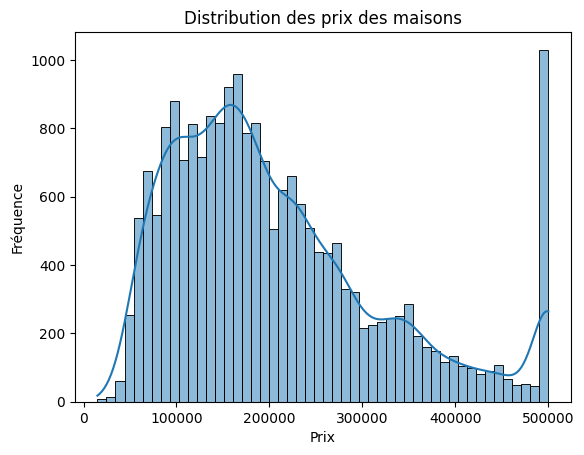

In [6]:
sns.histplot(df["median_house_value"], bins=50, kde=True)
plt.title("Distribution des prix des maisons")
plt.xlabel("Prix")
plt.ylabel("Fréquence")
plt.show()


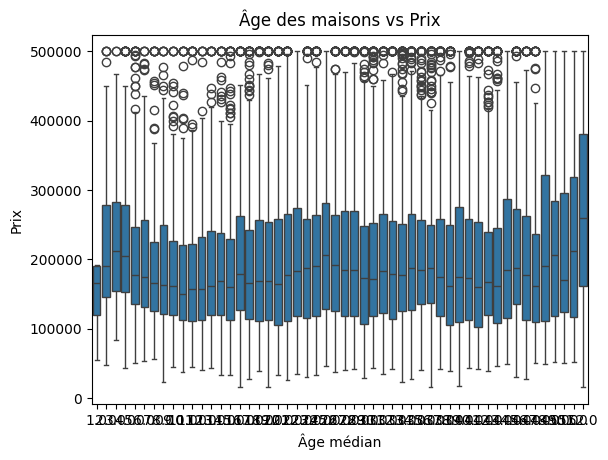

In [7]:
sns.boxplot(x=df["housing_median_age"], y=df["median_house_value"])
plt.title("Âge des maisons vs Prix")
plt.xlabel("Âge médian")
plt.ylabel("Prix")
plt.show()


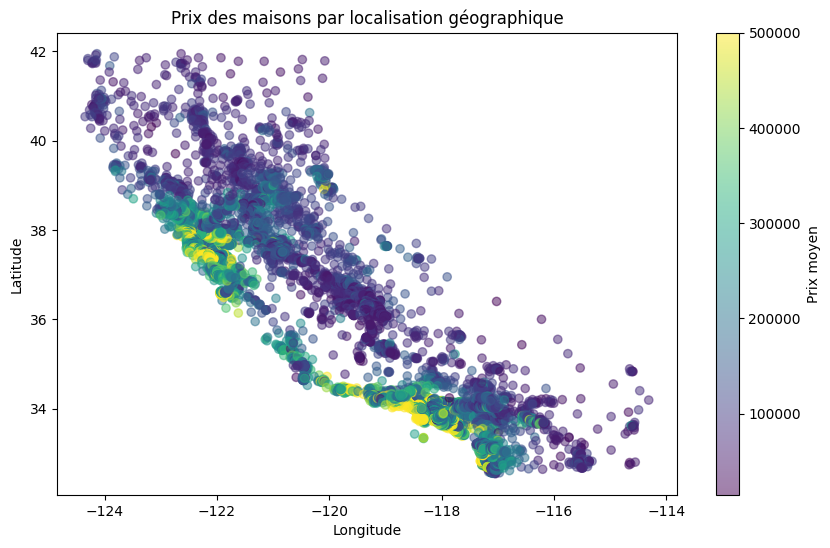

In [8]:
plt.figure(figsize=(10,6))
plt.scatter(df["longitude"], df["latitude"], c=df["median_house_value"], cmap="viridis", alpha=0.5)
plt.colorbar(label="Prix moyen")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Prix des maisons par localisation géographique")
plt.show()


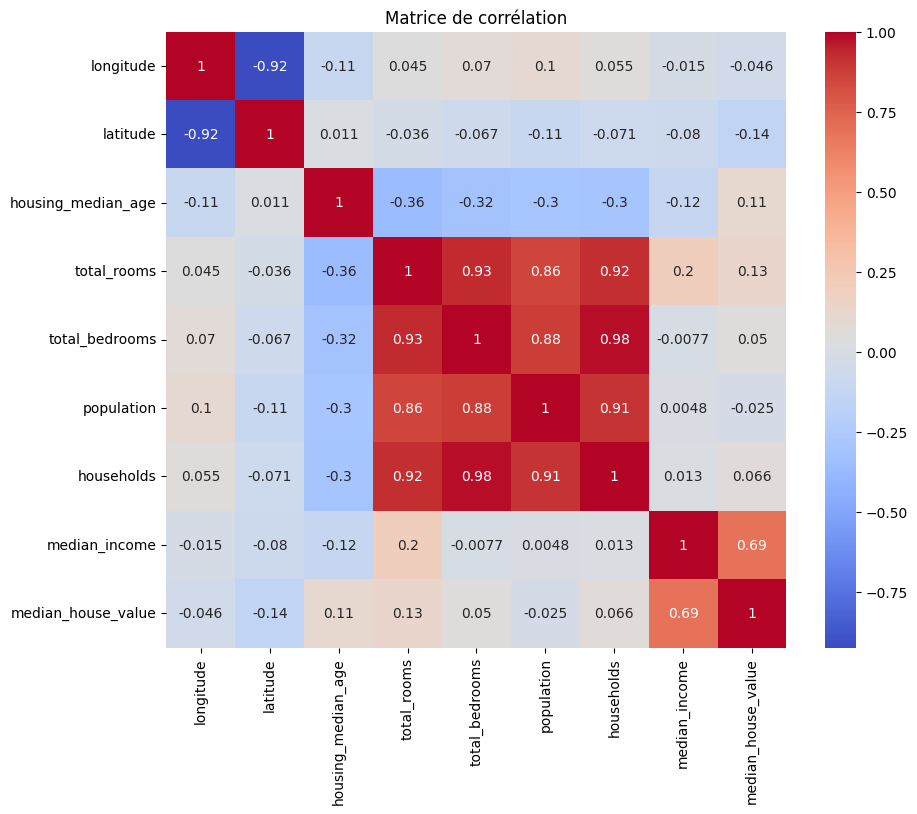

In [9]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Matrice de corrélation")
plt.show()


In [10]:
corr = df.corr(numeric_only=True)["median_house_value"].sort_values(ascending=False)
print("Corrélations avec le prix :")
print(corr)


Corrélations avec le prix :
median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64


In [11]:
df_clean = df.dropna()

X = df_clean.drop("median_house_value", axis=1).select_dtypes(include=[np.number])
y = df_clean["median_house_value"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

coefficients = pd.Series(model.coef_, index=X.columns).sort_values(key=abs, ascending=False)
print("Importance des variables (régression linéaire) :")
print(coefficients)


Importance des variables (régression linéaire) :
longitude            -42546.706006
latitude             -42336.042987
median_income         40293.278408
housing_median_age     1155.097108
total_bedrooms          115.830375
households               41.640434
population              -36.758767
total_rooms              -8.440418
dtype: float64
